## Project Description : Car Price Prediciton 

## Import Libraries

In [1]:
## for loading and preprocessing 
import pandas as pd
import numpy as np 

## for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## splitting dataset
from sklearn.model_selection import train_test_split

## load regression model 
from sklearn.linear_model import LinearRegression

## evaluation metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## Loading Data & Creating Copy

In [2]:
## read dataset
data = pd.read_csv("datasets/car_price_prediction.csv")

In [3]:
## create a deep copy 
df = data.copy()

## Data Preview And Understanding
- Loading the dataset

In [4]:
## view the first rows 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
## view the last five rows 
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [6]:
## check the number of rows and columns 
print(f'Total number of rows: {df.shape[0]} -> Total number of columns: {df.shape[1]}')

Total number of rows: 19237 -> Total number of columns: 18


In [7]:
## get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
## checking for missing values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
## checking for duplicated values 
df.duplicated().sum()

313

In [10]:
## checking type on columns
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [11]:
## finding unique instances in each column 
print(np.unique(df['Price']))


[       1        3        6 ...   627220   872946 26307500]


In [12]:
## finding unique instances in each column 
print(np.unique(df['Model']))

['09-Mar' '100' '100 NX' ... 'macan S' 'tC' 'xD']


In [13]:
print(np.unique(df['Mileage']))

['0 km' '1000 km' '10000 km' ... '99999 km' '999999 km' '999999999 km']


## Data preprocessing 
- replacing unsual characters with NaN values
- Drop the Id column
- Normalizing column names
- Remove km from Mileage column
- Filling of missing 

In [14]:
df['Levy'] = df['Levy'].replace('-', np.nan)

In [15]:
## finding unique instances in each column 
##print(np.unique(df['Levy']))

In [16]:
df = df.drop(['ID'], axis=1)

In [17]:
##change column names to lower case and replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [18]:
df.columns

Index(['price', 'levy', 'manufacturer', 'model', 'prod._year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

In [19]:
## remove km from the mileage column
df['mileage'] = df['mileage'].str.replace(' km', '')
df['mileage'] = df['mileage'].str.replace('-km', '')

In [20]:
## convert the mileage column type to float
df['mileage'] = df['mileage'].astype('int64')

In [21]:
df['levy'].isnull().sum()

5819

In [22]:
## converting column type to float
df['levy'] = df['levy'].astype('float')

In [23]:
df['levy'] = df['levy'].fillna(df['levy'].mean())

In [24]:
df['levy'].isnull().sum()

0

## Exploratory Data Analysis
- statistical summary
- Target variable analysis

In [25]:
df.describe().round()

,price,levy,prod._year,mileage,cylinders,airbags
count,19237.0,19237.0,19237.0,1.923700e+04,19237.0,19237.0
mean,18556.0,907.0,2011.0,1.532236e+06,5.0,7.0
std,190581.0,386.0,6.0,4.840387e+07,1.0,4.0
min,1.0,87.0,1939.0,0.000000e+00,1.0,0.0
25%,5331.0,730.0,2009.0,7.013900e+04,4.0,4.0
50%,13172.0,907.0,2012.0,1.260000e+05,4.0,6.0
75%,22075.0,917.0,2015.0,1.888880e+05,4.0,12.0
max,26307500.0,11714.0,2020.0,2.147484e+09,16.0,16.0


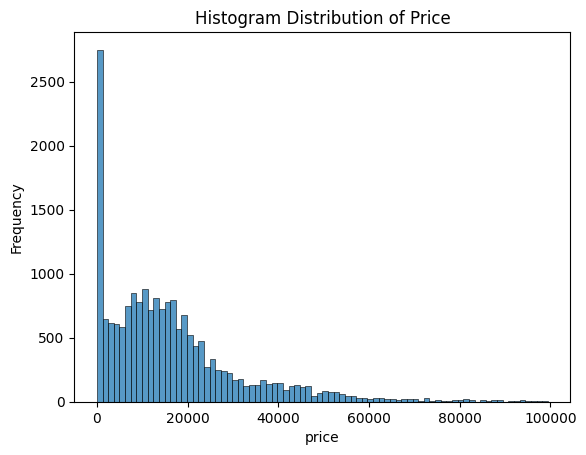

In [26]:

sns.histplot(df['price'][df['price'] < 100000])

plt.title('Histogram Distribution of Price')
plt.xlabel('price')
plt.ylabel('Frequency')

plt.show()

In [27]:
## log transformation 
log_price = np.log1p(df['price'])

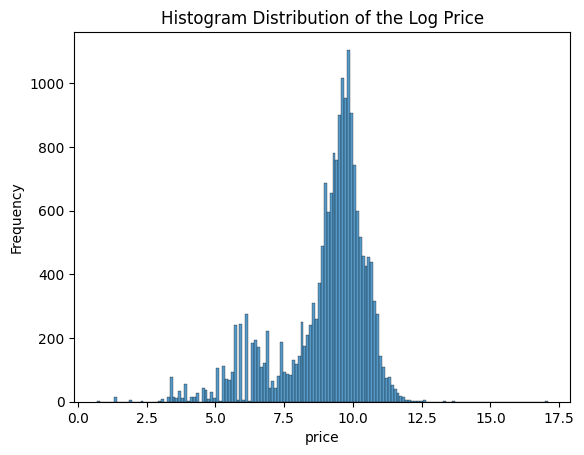

In [28]:
sns.histplot(log_price)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('price')
plt.ylabel('Frequency')

plt.show()


## Building A Validation Framework / Splitting Dataset
- Training set 60 %
- Validation dataset 20%
- Test dataset 20%


In [29]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11) 

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')


Train set 11541
Valid set 3848
Test set 3848


In [30]:
df_train.head()

,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
18929,8781,1268.0,TOYOTA,Aqua,2012,Sedan,No,Hybrid,1.5,87000,4.0,Automatic,Front,04-May,Right-hand drive,Black,2
7985,25089,585.0,TOYOTA,Prius V HYBRID,2013,Hatchback,No,Hybrid,1.8,65649,4.0,Variator,Front,04-May,Left wheel,Sky blue,9
5374,8320,640.0,KIA,Optima,2013,Sedan,Yes,Petrol,2,52448,4.0,Automatic,Front,04-May,Left wheel,Silver,4
2925,16621,562.0,CHEVROLET,Cruze,2015,Sedan,Yes,Petrol,1.4 Turbo,144000,4.0,Tiptronic,Front,04-May,Left wheel,White,12
16823,14113,769.0,FORD,Transit,2011,Goods wagon,No,Diesel,2.2 Turbo,165852,4.0,Manual,Front,04-May,Left wheel,White,2


In [31]:
## selecting target column and converting it to a vector format
y_train = df_train['price'].values
y_valid = df_valid['price'].values
y_test = df_test['price'].values
y_train_full = df_train_full['price'].values

In [32]:
#y_train

In [33]:
del df_train['price']
del df_valid['price']
del df_test['price']
del df_train_full['price']

## Train A Baseline Regression Model
- Selecting baseline features
- Train a regression model

In [34]:
baseline_features = ['levy', 'prod._year', 'cylinders', 'airbags']

df_train_bl = df_train[baseline_features]

In [35]:
X_train_bl = df_train_bl.values
X_train_bl

array([[1.268e+03, 2.012e+03, 4.000e+00, 2.000e+00],
       [5.850e+02, 2.013e+03, 4.000e+00, 9.000e+00],
       [6.400e+02, 2.013e+03, 4.000e+00, 4.000e+00],
       ...,
       [5.620e+02, 2.015e+03, 4.000e+00, 1.000e+01],
       [9.190e+02, 2.012e+03, 6.000e+00, 1.200e+01],
       [1.807e+03, 2.012e+03, 8.000e+00, 1.200e+01]])

In [36]:
df_train.dtypes

levy                float64
manufacturer         object
model                object
prod._year            int64
category             object
leather_interior     object
fuel_type            object
engine_volume        object
mileage               int64
cylinders           float64
gear_box_type        object
drive_wheels         object
doors                object
wheel                object
color                object
airbags               int64
dtype: object

In [37]:
## lets train model 
model = LinearRegression() 
model.fit(X_train_bl, y_train)


LinearRegression()

## Model Evaluation
- Generate the validation predictions
- Compare the validation predictions to the actual predictions
- Return an accuracy score
  

In [38]:
## generate validation baseline features
df_valid_bl = df_valid[baseline_features]

## convert dataframe into numpy array
X_valid_bl = df_valid_bl.values

In [39]:
X_valid_bl

array([[ 906.83812789, 2008.        ,    4.        ,    4.        ],
       [ 906.83812789, 2012.        ,    8.        ,    8.        ],
       [ 640.        , 2013.        ,    4.        ,    4.        ],
       ...,
       [1537.        , 2009.        ,    6.        ,   12.        ],
       [ 784.        , 2017.        ,    4.        ,    4.        ],
       [ 906.83812789, 1999.        ,    6.        ,    6.        ]])

## generate our validation prediction

In [40]:
y_valid_pred = model.predict(X_valid_bl)

In [41]:
acc_score = model.score(X_valid_bl, y_valid)

In [42]:
print(f'Baseline Validation Accuracy: {acc_score}')

Baseline Validation Accuracy: 0.0015848264564740644


In [43]:
y_valid_pred

array([20444.38291514, 23627.60681212, 21700.23230651, ...,
       16343.58956705, 23424.43185919, 18091.51867411])

In [44]:
rmse = root_mean_squared_error(y_valid_pred, y_valid)

In [45]:
print(f'Mean Accurace for the Model: {rmse}')

Mean Accurace for the Model: 18192.12412727715


## Training Final Model
- df_train_full, df_text

In [46]:
df_train_final = df_train_full[baseline_features]

X_train_full = df_train_final.values



In [48]:
df_test_final = df_test[baseline_features]

X_test = df_test_final.values

In [50]:
final_model = LinearRegression()

final_model.fit(X_train_full, y_train_full)

LinearRegression()

In [51]:
y_test_predict = final_model.predict(X_test)


In [53]:
rmse = root_mean_squared_error(y_test, y_test_predict)

print(f'Final Model Accurace: {rmse}')

Final Model Accurace: 17764.98338268209
